In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import re

In [3]:
data = pd.read_csv("winemag-data-130k-v2.csv", index_col=0).drop(["taster_twitter_handle"],axis='columns')

### Number of Null Values for Each Feature

In [3]:
print(data.isna().sum())

country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
region_2       79460
taster_name    26244
title              0
variety            1
winery             0
dtype: int64


In [4]:
print(data.isna().sum().to_frame())

                 0
country         63
description      0
designation  37465
points           0
price         8996
province        63
region_1     21247
region_2     79460
taster_name  26244
title            0
variety          1
winery           0


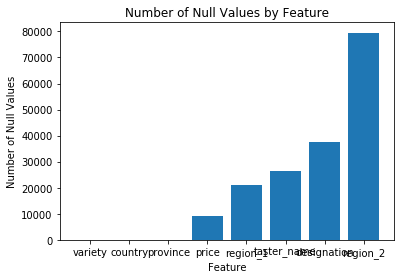

In [5]:
num_nas = {}
for i in data.columns:
    if data[i].isnull().sum() > 0:
        num_nas[i] = data[i].isnull().sum()
num_nas = dict(sorted(num_nas.items(),key=operator.itemgetter(1)))
plt.bar(range(len(num_nas)), list(num_nas.values()))
plt.xticks(range(len(num_nas)), list(num_nas.keys()))
plt.title("Number of Null Values by Feature")
plt.xlabel("Feature")
plt.ylabel("Number of Null Values")
plt.show()

### Correlation between Points and Price

In [6]:
print("Pearson Correlation: "+str(data["points"].corr(data["price"])))

Pearson Correlation: 0.4161667418606225


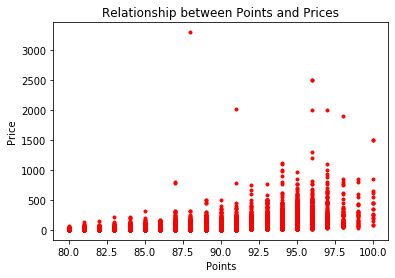

In [7]:
plt.plot(data['points'],data['price'],'r.')
plt.title("Relationship between Points and Prices")
plt.xlabel("Points")
plt.ylabel("Price")
plt.show()

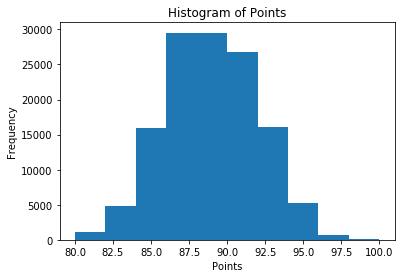

In [8]:
plt.hist(data['points'])
plt.title("Histogram of Points")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()

/Users/jordan5560/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jordan5560/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


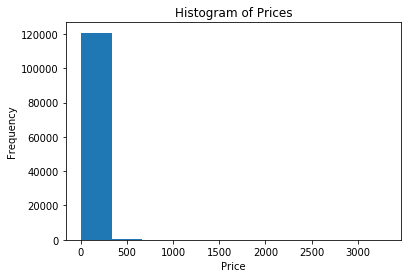

In [9]:
plt.hist(data['price'])
plt.title("Histogram of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

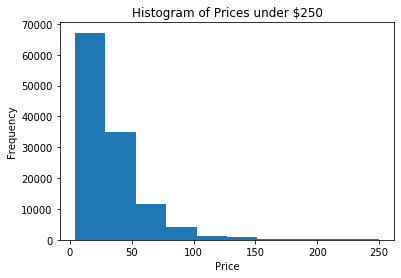

In [10]:
plt.hist(data[data['price']<=250]['price'])
plt.title("Histogram of Prices under $250")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

### Average Point and Price for each Winery

In [11]:
wineries = data[["winery", "points", "price"]].groupby(by="winery").mean()

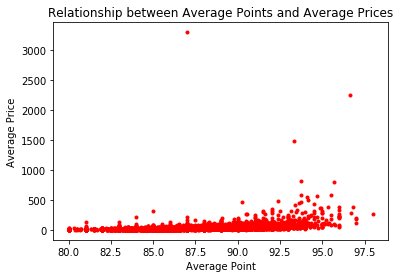

In [12]:
plt.plot(wineries['points'],wineries['price'],'r.')
plt.title("Relationship between Average Points and Average Prices")
plt.xlabel("Average Point")
plt.ylabel("Average Price")
plt.show()

In [13]:
print("Correlation between Average Points and Average Price: "+str(wineries['points'].corr(wineries['price'])))

Correlation between Average Points and Average Price: 0.34964807385888025


### Number of Wineries by Country

In [14]:
countries = data[ ["country", "winery"] ].groupby(by="country").count().sort_values(by="winery")[::-1]
print(countries)

                        winery
country                       
US                       54504
France                   22093
Italy                    19540
Spain                     6645
Portugal                  5691
Chile                     4472
Argentina                 3800
Austria                   3345
Australia                 2329
Germany                   2165
New Zealand               1419
South Africa              1401
Israel                     505
Greece                     466
Canada                     257
Hungary                    146
Bulgaria                   141
Romania                    120
Uruguay                    109
Turkey                      90
Slovenia                    87
Georgia                     86
England                     74
Croatia                     73
Mexico                      70
Moldova                     59
Brazil                      52
Lebanon                     35
Morocco                     28
Peru                        16
Ukraine 

In [15]:
print("Number of countries: "+str(len(countries)))

Number of countries: 43


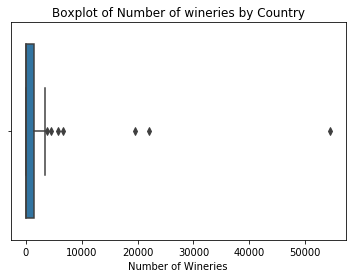

In [16]:
sns.boxplot(countries)
plt.title("Boxplot of Number of wineries by Country")
plt.xlabel("Number of Wineries")
plt.show()

In [17]:
tasters = data[ ["taster_name", "points"] ].groupby(by="taster_name").mean()[::-1]
print("Highest Average Points Given by Tasters\n\n",tasters)

Highest Average Points Given by Tasters

                        points
taster_name                  
Virginie Boone      89.213379
Susan Kostrzewa     86.609217
Sean P. Sullivan    88.755739
Roger Voss          88.708003
Paul Gregutt        89.082564
Mike DeSimone       89.101167
Michael Schachner   86.907493
Matt Kettmann       90.008686
Lauren Buzzeo       87.739510
Kerin O’Keefe       88.867947
Joe Czerwinski      88.536235
Jim Gordon          88.626287
Jeff Jenssen        88.319756
Fiona Adams         86.888889
Christina Pickard   87.833333
Carrie Dykes        86.395683
Anne Krebiehl MW    90.562551
Anna Lee C. Iijima  88.415629
Alexander Peartree  85.855422


In [18]:
print("Standard Deviation for Points\n\n", data[["taster_name", "points"]].groupby(by="taster_name").std()[::-1])

Standard Deviation for Points

                       points
taster_name                 
Virginie Boone      2.996796
Susan Kostrzewa     2.376140
Sean P. Sullivan    2.458547
Roger Voss          3.036373
Paul Gregutt        2.814445
Mike DeSimone       1.992549
Michael Schachner   3.022859
Matt Kettmann       2.571257
Lauren Buzzeo       2.530672
Kerin O’Keefe       2.474240
Joe Czerwinski      2.858701
Jim Gordon          2.698341
Jeff Jenssen        2.022727
Fiona Adams         1.739437
Christina Pickard   3.600926
Carrie Dykes        1.998618
Anne Krebiehl MW    2.373100
Anna Lee C. Iijima  2.561359
Alexander Peartree  1.934511


### Types of Variety

In [19]:
variety_counts = data['variety'].value_counts().rename_axis('variety').reset_index(name='counts')
print(variety_counts.head(5),'\n')
print(variety_counts.tail(5))

                    variety  counts
0                Pinot Noir   13272
1                Chardonnay   11753
2        Cabernet Sauvignon    9472
3                 Red Blend    8946
4  Bordeaux-style Red Blend    6915 

                     variety  counts
702               Blauburger       1
703        Otskhanuri Sapere       1
704  Syrah-Grenache-Viognier       1
705                  Blatina       1
706                  Pignolo       1


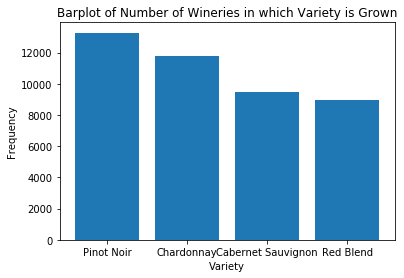

In [20]:
plt.bar(x=variety_counts['variety'].head(4),height=variety_counts['counts'].head(4))
plt.title("Barplot of Number of Wineries in which Variety is Grown")
plt.xlabel("Variety")
plt.ylabel("Frequency")
plt.show()

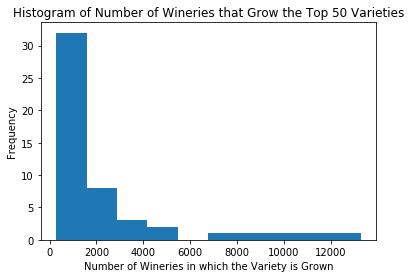

In [21]:
plt.hist(variety_counts['counts'].head(50))
plt.title("Histogram of Number of Wineries that Grow the Top 50 Varieties")
plt.xlabel("Number of Wineries in which the Variety is Grown")
plt.ylabel("Frequency")
plt.show()

Data are skewed to the left.

### Designation, Province, Region

In [22]:
print('Number of Designations in the data:',len(data['designation'].unique()))
print('Number of Provinces in the data:',len(data['province'].unique()))
print('Number of Regions in the data:',len(data['region_1'].unique()))
print('Number of Regions in the data:',len(data['region_2'].unique()))

Number of Designations in the data: 37980
Number of Provinces in the data: 426
Number of Regions in the data: 1230
Number of Regions in the data: 18


#### Histograms

count    37979.000000
mean         2.435714
std         16.303071
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       2009.000000
Name: designation, dtype: float64


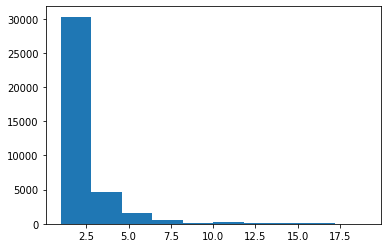

In [23]:
print(data['designation'].value_counts().describe())
plt.hist(data['designation'].value_counts()[data['designation'].value_counts()<20])
plt.show()

count      425.000000
mean       305.665882
std       1920.003074
min          1.000000
25%          3.000000
50%         12.000000
75%         53.000000
max      36247.000000
Name: province, dtype: float64


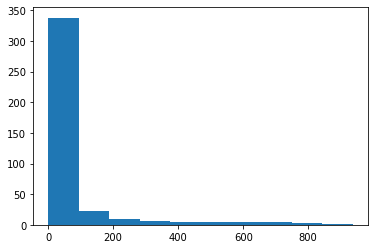

In [24]:
print(data['province'].value_counts().describe())
plt.hist(data['province'].value_counts()[data['province'].value_counts()<1000])
plt.show()

count    1229.000000
mean       88.465419
std       298.154276
min         1.000000
25%         3.000000
50%        11.000000
75%        51.000000
max      4480.000000
Name: region_1, dtype: float64


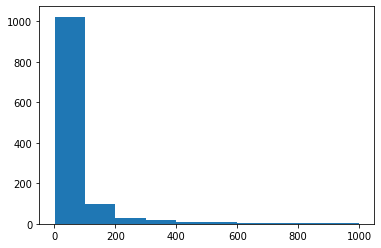

In [25]:
print(data['region_1'].value_counts().describe())
plt.hist(data['region_1'].value_counts()[data['region_1'].value_counts()<1000])
plt.show()

### Feature Extraction - Year

In [26]:
data['year'] = data.title.apply(lambda x: str(re.findall("20[0-9]{2}",x)) if len(re.findall("20[0-9]{2}",x))>0 else '0').str.replace('[\[\]\']','')

In [27]:
# manually converting duplicated years
data[data['year']== "2004, 2004"]
data.iloc[63763,12] = '2004'

In [28]:
data[data['year']== "2003, 2003"]
data.iloc[49729,12] = '2003'

In [29]:
data[data['year']== "2011, 2067"]
data.iloc[31975,12] = '2011'

In [30]:
data['year'] = data['year'].apply(lambda x: int(float(x)))

In [31]:
data['year'].value_counts()

2013    15875
2012    15747
2014    15582
2011    12558
2010    12167
2015    10052
2009     9878
2008     7439
2007     7053
0        6345
2006     5772
2016     3691
2005     3613
2004     1774
2000      759
2001      691
2003      598
2002      366
2017       11
Name: year, dtype: int64

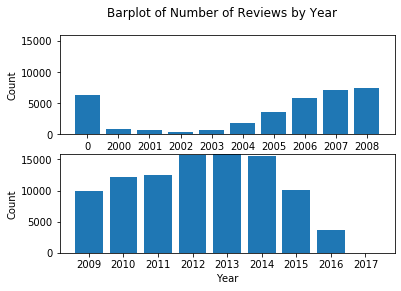

In [32]:
a = pd.DataFrame(data['year'].value_counts())
a = a.reset_index(drop=False)
a.columns = ['year','count']
a['year'] = a['year'].astype(str)
a = a.sort_values(by='year')

fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Barplot of Number of Reviews by Year')
ax1.bar(x=a.year[0:10],height=a['count'][0:10])
ax2.bar(x=a.year[10:],height=a['count'][10:])
ax1.set_ylim(0,max(a['count']))
ax2.set_ylim(0,max(a['count']))
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
ax2.set_xlabel('Year')
plt.show()

### Word Cloud

In [38]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [50]:
text = " ".join(review for review in data.description)

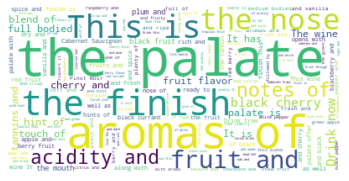

In [51]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
data.to_csv("wine.csv")